# Project: Test a Perceptual Phenomenon
#### Alen Mrsic

### Libraries

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Data Analysis

In [182]:
#import CSV file
strop_csv_file = 'stroopdata.csv'
strop_data = pd.read_csv(strop_csv_file,delimiter=',')
# display first 5 rows of data
display(strop_data.head())
# display descriptive statistics of data
display(strop_data.describe())
# calculate diff between Congruent and Incongruent data
total_diff = pd.DataFrame(strop_data.Congruent - strop_data.Incongruent)
total_diff.describe()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


,0
count,24.000000
mean,-7.964792
std,4.864827
min,-21.919000
25%,-10.258500
50%,-7.666500
75%,-3.645500
max,-1.950000


## QUESTIONS

### 1. What is our independent variable? What is our dependent variable?

<ul>
<li><b>Independent variable</b> in this task is congruent and incongruent words. </li>
<li><b>Dependent variable</b> is response time to read words.</li>
</ul>

<b>Explanation:</b>
Congruent and incongruent words cause ses a change in response time and it isn't possible that response time could cause a change in congruent and incongruent words. 

### 2. What is an appropriate set of hypotheses for this task? Specify the null and alternative hypotheses based on what you think the researchers might be interested in. Justify your choices.

#### Hyothesis
<ul>
<li>Ho - Null hypothesis defines that there is no significant difference between specified populations, in this case,
Ho would be that there is no significant difference in mean response time reading congruent and incongruent words (μcongruent - μincongruent= 0). μincongruent is mean response time to read incongruent words and μcongruent is mean response time to read congruent words.
</li>

<li>Ha -
Alternative hypothesis is that there is a difference in mean response time reading congruent and incongruent words (μcongruent - μincongruent  ≠ 0). 
</li>
</ul>

#### Appropriate test
##### T-test
The t-test enables us to decide whether the
mean of one condition is really different from the mean of another condition.  We want to compare performance in the two conditions.
A one-tailed test is appropriate if the estimated value may depart from the reference value in only one direction and in our example it's an one-tailed test in negative direction.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [136]:
# prepare / separate data
congruent = strop_data.Congruent
incongruent = strop_data.Incongruent

#### Measures of Central Tendency

In [265]:
#congruent central tendency measures
con_mean = congruent.mean()
con_median = congruent.median()

#incongruent central tendency measures
inc_mean = incongruent.mean()
inc_median = incongruent.median()

#print results
index = ['Congruent', 'Incongruent']
df_result = pd.DataFrame({
      'Mean': [con_mean, inc_mean],
      'Median': [con_median, inc_median]},
       index=index)
df_result

,Mean,Median
Congruent,14.051125,14.3565
Incongruent,22.015917,21.0175


#### Variability Measurement

In [266]:
#congruent variability measure
con_std = congruent.std()
#incongruent variability measure
inc_std = incongruent.std()

#print results
index = ['Congruent', 'Incongruent']
df_result = pd.DataFrame({
      'Standard deviation': [con_std, inc_std]},
       index=index)
df_result

,Standard deviation
Congruent,3.559358
Incongruent,4.797057


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [305]:
# creating new dataframe with id colum, preparing data for visualization
id_strop_data = strop_data
id_strop_data['Id'] = strop_data.index

# creating new dataframe with melted data, adding Congruent and Incongruent values into one column
strop_visual= pd.melt(id_strop_data, 
       id_vars=['Id'],
       value_vars=['Congruent', 'Incongruent'],
        var_name='Words',
        value_name='ResponseTime')

Text(0,0.5,'Response Time')

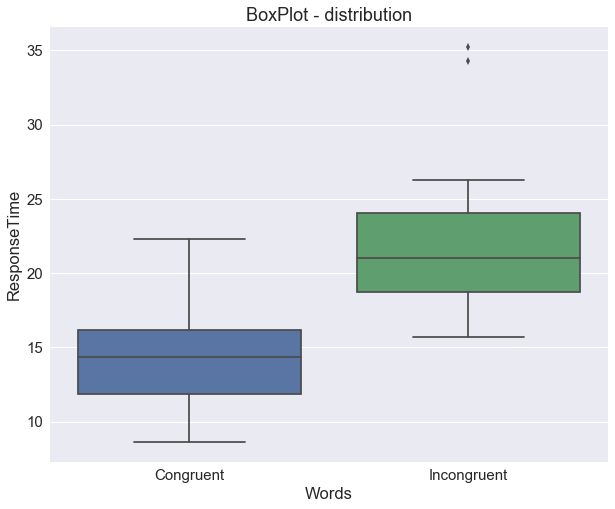

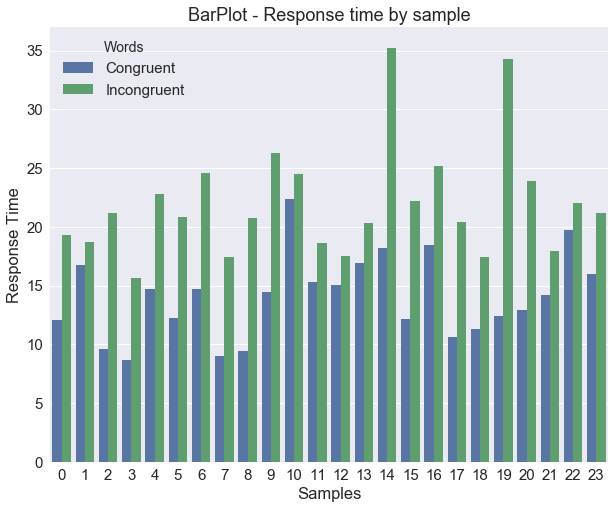

In [304]:
# customized width, height tuple in inches
plt.figure(figsize=(10,8))
# title  name
plt.title('BoxPlot - distribution')
# creating box plot
vboxplot = sns.boxplot(x="Words", y="ResponseTime", data=strop_visual)

# customized width, height tuple in inches
plt.figure(figsize=(10,8))
# title  name
plt.title('BarPlot - Response time by sample')
# creating bar plot
vbarplot = sns.barplot(x="Id", y="ResponseTime", hue="Words", data=strop_visual)
# name of x label 
plt.xlabel("Samples")
# name of y label 
plt.ylabel("Response Time")

#### BoxPlot - distribution present:
<ul>
<li> a longer range between min and max value in congruent words (response time) </li>
<li> a difference in the median between congruent and incongruent words  </li>
<li> in incongruent words, we notice couple outliers  </li>
<li> congruent words have smaller interquartile range  </li>

</ul>

#### BarPlot - Response time by sample present:
<ul>
<li> each congruent word takes less time then an incongruent word to read (faster response time for congruent words)  </li>
<li> some samples like 14 and 19 really stands out in response time </li>
</ul>

### 5. Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

<ul>

<li>Confidence level = 95% </li>
<li>Degrees of freedom (Df) = 23 </li>
<li>t-critical = 2.069 </li>
<li>A = 0.05</li>

</ul>

In [325]:
t_test = stats.ttest_rel(incongruent,congruent)
print("p-value: " + str(t_test.pvalue))
print("t-value: " + str(t_test.statistic))

p-value: 4.103000585711178e-08
t-value: 8.020706944109957


<b>Explanation:</b> If the Null hypothesis is true there's only 0.0000041% chance there is no significant difference in mean response time reading congruent and incongruent words. We can see in result that t_value is outside of t-critical value, so we can reject a Null hypothesis. Also, that correspond to real life situation when we try to read congruent and incongruent words, we'll need more time to read incongruent words. 

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

<ul>

<li>
When our brain needs to resolve differences between two sources of information, it needs to work harder and that makes the task take longer. Check the research: <a href="https://imotions.com/blog/the-stroop-effect/">The stroop effect.</a>
</li>
<li> An example that would have a similar effect -  the reaction time when driving under the influence of alchohol. Some research about that: <a href="https://www.researchgate.net/publication/19464877_Effects_of_alcohol_and_practice_on_choice_reaction_time">Reaction Time and alcohol</a>
</li>
</ul>

### References
<ul>
<li><a href="https://en.wikipedia.org/wiki/Stroop_effect">Wikipedia: Stroop effect</a></li>
<li><a href="https://en.wikipedia.org/wiki/Null_hypothesis">Null hypothesis</a></li>
<li><a href="https://en.wikipedia.org/wiki/One-_and_two-tailed_tests">One and two tailed tests</a></li>
<li><a href="http://www.statisticshowto.com/tables/t-distribution-table">T distribution table</a></li>
<li><a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html">SciPy stats.ttest_rel</a></li>
</ul>